# STAT 201 Group 43 - Group Project Proposal

## Title: Determining whether a mutant strain of the nematode C. elegans slows its rate of locomotion when in the presence of nutrients

In [9]:
# Please run this cell before continuing, installing packages if necessary.
library(tidyverse)
library(RColorBrewer)
library(tidymodels)
set.seed(2023)
options(repr.plot.width = 14, repr.plot.height = 8)

## Introduction

[placeholder]

## Preliminary results

In [10]:
# Load dataset
worm_data_raw <- read_csv('N2_CB1112_baseline_output_12_11_2022.csv', show_col_types = FALSE)

head(worm_data_raw)
nrow(worm_data_raw)

time_bin,worm,time,speed,x,y,angularspeed,pathlength,kink,bias,curve,dir,crab,length,midline,width,morphwidth,area,Strain
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5,27,4.707,0.2312,23.73,29.97,10.880,0.07470,57.80,1,42.10,0,0.02003,0.7560,0.9690,0.2386,0.0867,0.0871,N2_Food
5,156,4.484,0.2195,36.94,25.75,7.300,0.13040,34.50,1,31.17,0,0.02087,0.9320,1.0360,0.1998,0.1648,0.1556,N2_Food
5,185,4.715,0.2563,25.62,24.98,34.660,0.08360,38.50,1,30.64,0,0.02118,0.7200,0.9310,0.2660,0.1404,0.1324,N2_Food
5,192,4.600,0.1354,28.47,19.23,5.484,0.06230,28.60,1,26.06,0,0.00981,0.5806,0.8200,0.1979,0.1378,0.1079,N2_Food
5,198,4.715,0.1797,24.28,30.77,3.680,0.05940,48.56,1,35.38,0,0.01484,0.7950,0.9263,0.1696,0.1467,0.1315,N2_Food
5,208,4.824,0.2135,27.83,25.23,5.035,0.05133,51.94,1,34.78,0,0.00853,0.8657,0.9717,0.2160,0.1774,0.1526,N2_Food


[1] 252756

In [11]:
#Select worm, speed, Strain column
#Filter observations with Strain "CB1112_Food" and "CB1112_NoFood"
#Calculate average speed of each worm
worm_data_cleaned <- worm_data_raw |>
select(worm, speed, Strain) |>
filter(Strain %in% c("CB1112_Food", "CB1112_NoFood")) |>
group_by(Strain, worm) |>
summarize(speed = mean(speed))

head(worm_data_cleaned)
nrow(worm_data_cleaned)

`summarise()` has grouped output by 'Strain'. You can override using the
`.groups` argument.


Strain,worm,speed
<chr>,<dbl>,<dbl>
CB1112_Food,1,0.2243345
CB1112_Food,2,0.1039276
CB1112_Food,3,0.1803790
CB1112_Food,4,0.2429433
CB1112_Food,6,0.2389154
CB1112_Food,7,0.1302114


[1] 932

In [12]:
#Rename the column "Strain" as "food_status"
colnames(worm_data_cleaned)[1]  <- "food_status" 

#Change "CB1112_Food" to "Food", "CB1112_NoFood" to "NoFood"
worm_data_cleaned$food_status[worm_data_cleaned$food_status=="CB1112_Food"] <- "Food"
worm_data_cleaned$food_status[worm_data_cleaned$food_status=="CB1112_NoFood"] <- "NoFood"

head(worm_data_cleaned)
nrow(worm_data_cleaned)

food_status,worm,speed
<chr>,<dbl>,<dbl>
Food,1,0.2243345
Food,2,0.1039276
Food,3,0.1803790
Food,4,0.2429433
Food,6,0.2389154
Food,7,0.1302114


[1] 932

#### Table 1. Mean, Standard Deviation, Number of Observations Across Food and Nofood Groups

In [21]:
# Create Table 1
summary <- worm_data_cleaned |>
group_by(food_status) |>
summarize(mean = mean(speed),
          median = median(speed),
          sd = sd(speed),
          n=n())
summary

food_status,mean,median,sd,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
Food,0.1799004,0.1842810,0.04499372,521
NoFood,0.2018251,0.2052696,0.04383005,411


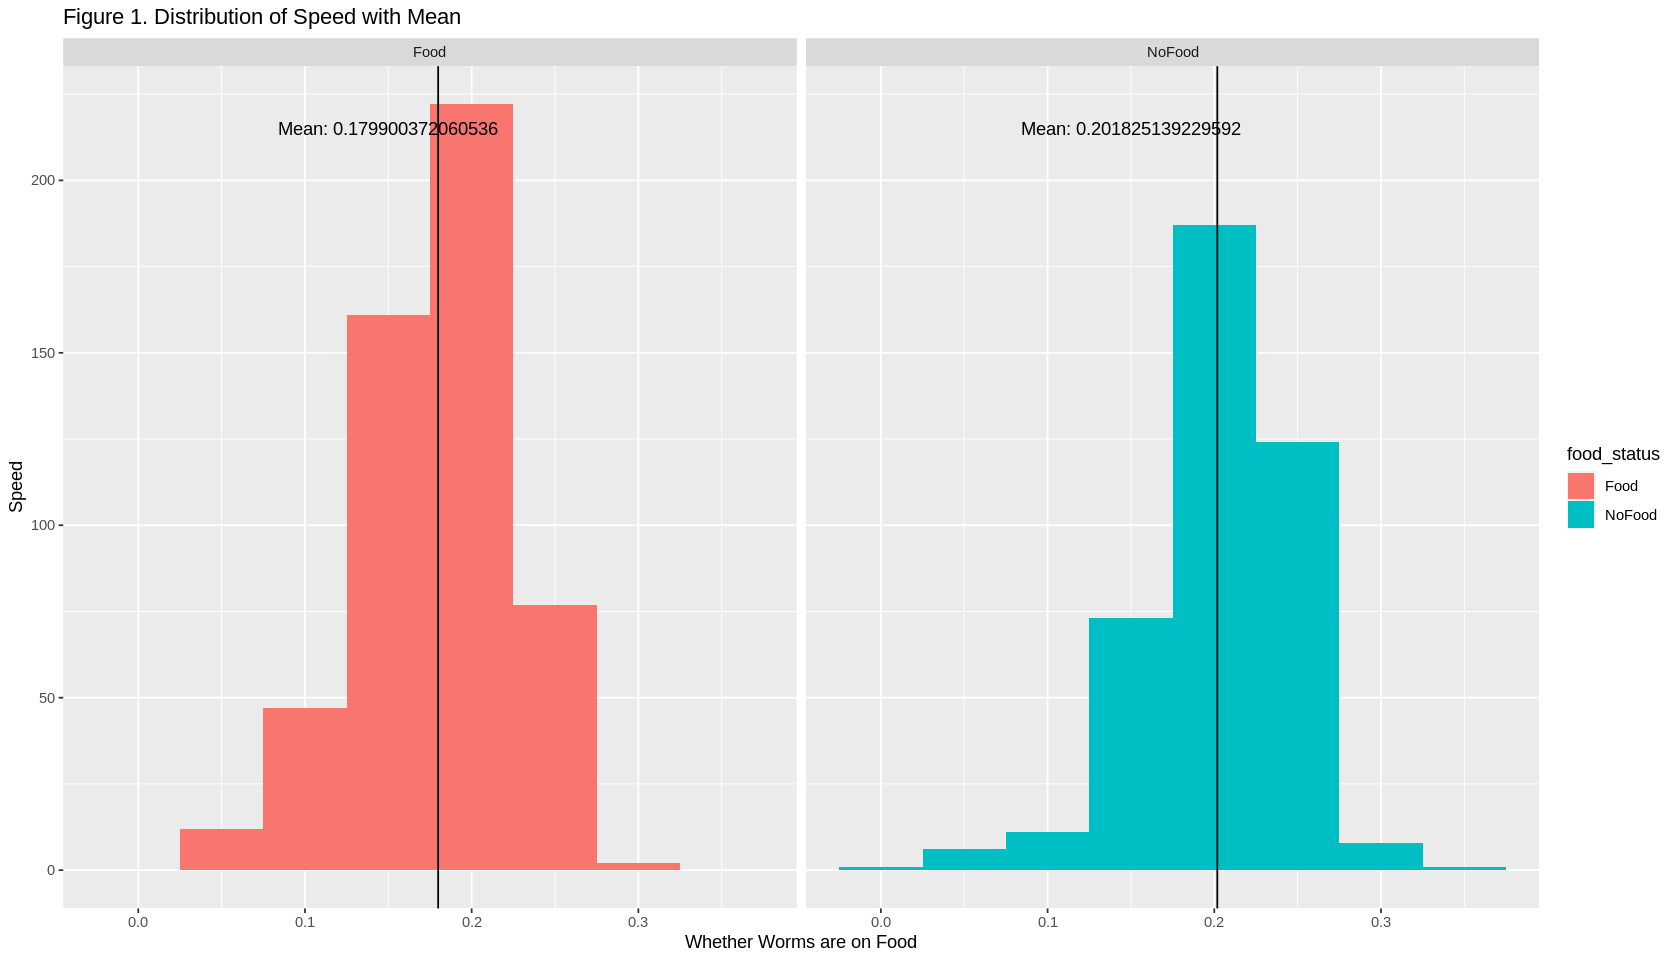

In [41]:
#Plots
hist <- worm_data_cleaned |>
ggplot(aes(x=speed, fill=food_status)) +
geom_histogram(binwidth=0.05) +
geom_vline(data = tibble(food_status=c("Food", "NoFood"), sample_mean=summary$mean), 
           aes(xintercept = sample_mean)) +
geom_text(data = tibble(food_status=c("Food", "NoFood"), sample_mean=summary$mean),
       mapping = aes(x = 0.15, y = 215, label=paste("Mean:", sample_mean))) +
facet_wrap(~food_status) +
labs(x="Whether Worms are on Food",
     y="Speed",
     title = "Figure 1. Distribution of Speed with Mean")

hist

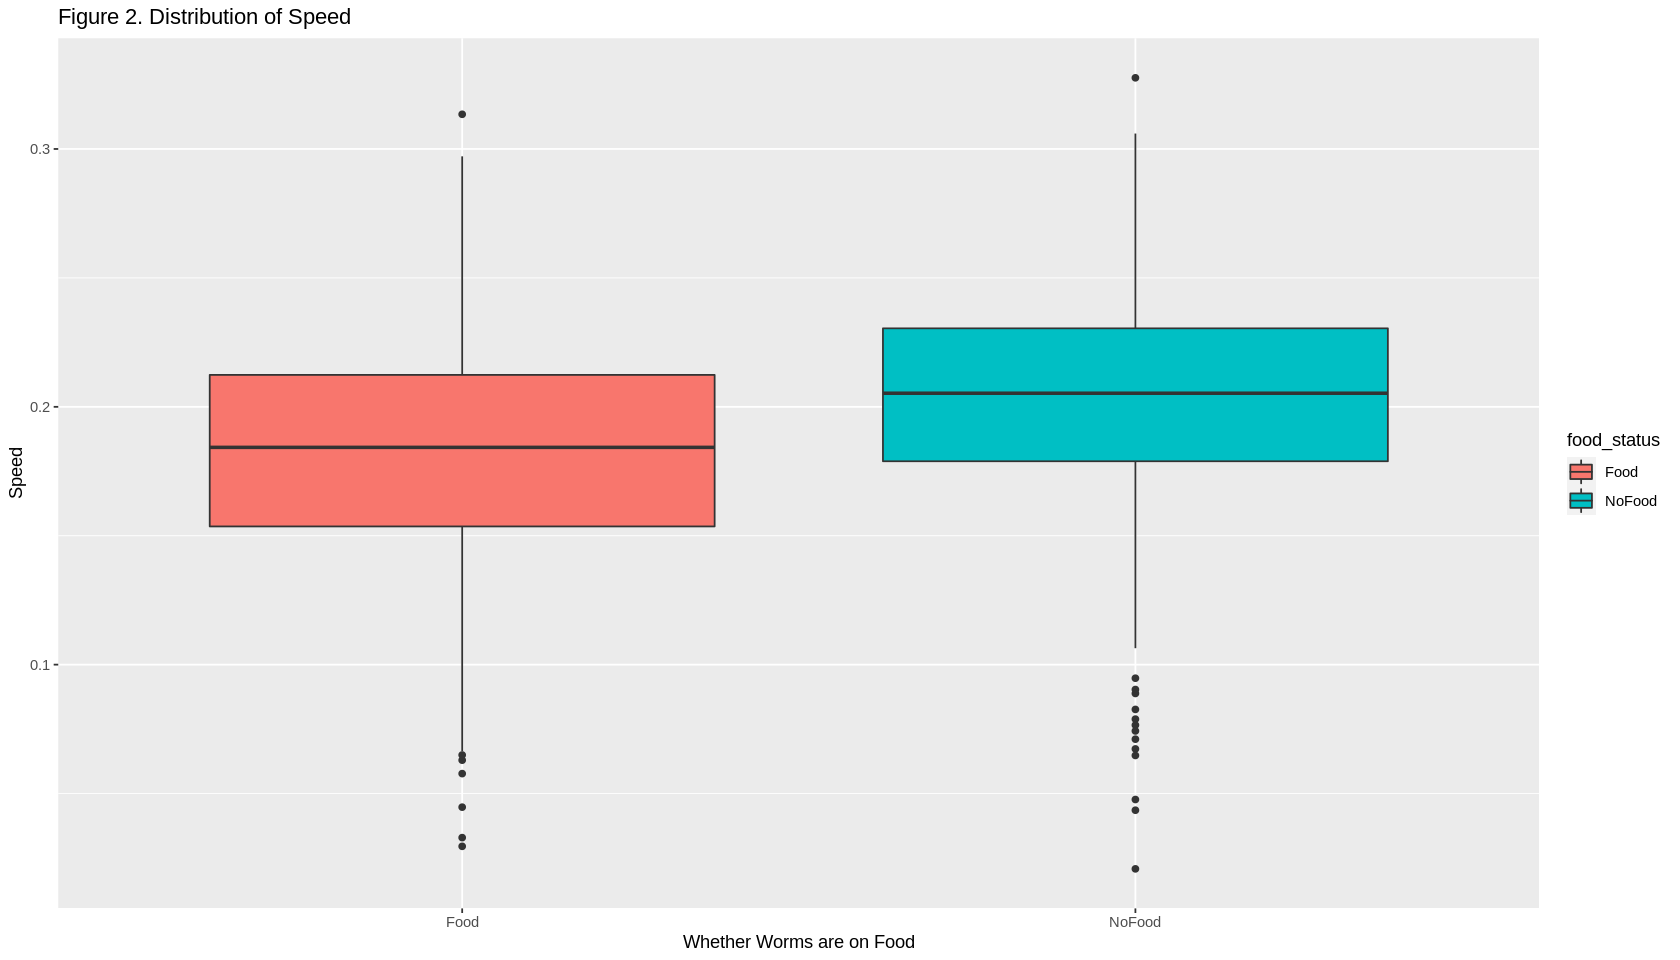

In [19]:
boxplot <- worm_data_cleaned |>
ggplot() +
geom_boxplot(aes(food_status, speed, fill = food_status)) +
labs(x="Whether Worms are on Food",
     y="Speed",
     title = "Figure 2. Distribution of Speed")

boxplot

## Methods: Plan

Based on the boxplot, the median of Nofood group is slightly higher than that of the Food group. Their interquartile range is about the same, but the NoFood group is more spread out with a higher maximum and a lower minimum. 


The two groups' histograms are both left-skewed with their centers at around 0.2. The mean of NoFood group (0.2018) is than that of the Food group (0.1799).

## References

[placeholder]